In [122]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [123]:
df = pd.read_csv('salary_data_cleaned.csv')

In [124]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,monthly,job_state,age
0,Data Scientist,"122,500",Kafene is a leading point-of-sale financing pa...,-1.0,Kafene,"New York, NY",51 to 200 Employees,2019.0,Company - Private,Consumer Product Rental,Personal Consumer Services,Unknown / Non-Applicable,0,0,NY,4.0
1,Data Scientist (Multiple Openings),"129,500","Employer: DePuy Synthes Sales, Inc.\nJob Title...",4.2,Johnson & Johnson,"Raritan, NJ",10000+ Employees,1887.0,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),0,0,NJ,136.0
2,Data Scientist,"95,000","TITLE: Data Scientist\nLOCATION: Bellevue, WA\...",4.7,AstrumU,"Bellevue, WA",1 to 50 Employees,2017.0,Company - Private,Computer Hardware Development,Information Technology,Unknown / Non-Applicable,0,0,WA,6.0
3,Data Scientist I,"86,000",Position Title: Data Scientist I\nSalary Range...,2.2,Vibrant Emotional Health,Remote,201 to 500 Employees,NaN,Nonprofit Organization,Civic & Social Services,Nonprofit & NGO,$5 to $25 million (USD),0,0,Remote,NaN
4,Data Scientist,"96,553",Focused on labor and employment law since 1958...,3.9,Jackson Lewis,"Houston, TX",1001 to 5000 Employees,1958.0,Company - Private,Legal,Legal,$100 to $500 million (USD),0,0,TX,65.0


In [125]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'monthly', 'job_state',
       'age'],
      dtype='object')

In [126]:
df['Job Title'] = df['Job Title'].apply(lambda x: x.lower())

In [127]:
df['Job Title'].value_counts()

data scientist                                                                                                         267
senior data scientist                                                                                                   61
lead data scientist                                                                                                     14
staff data scientist                                                                                                    10
data scientist i                                                                                                         9
junior data scientist                                                                                                    9
sr data scientist                                                                                                        9
data scientist ii                                                                                                        9
principal data s

In [146]:
df['Job Title Simplified']= df['Job Title'].str.replace(r'(data scientist).*', r'\1', regex=True)
df['Job Title Simplified'] = df['Job Title Simplified'].str.replace('senior', 'sr ', case=False)
df['Job Title Simplified'] = df['Job Title Simplified'].str.replace('sr.', 'sr ', case=False)
df['Job Title Simplified'] = df['Job Title Simplified'].str.replace('junior', 'jr ', case=False)
df['Job Title Simplified'] = df['Job Title Simplified'].str.replace('jr.', 'jr ', case=False)
df['Job Title Simplified'] = df['Job Title Simplified'].str.replace(r'\s+', ' ')
print(df['Job Title Simplified'].value_counts())

data scientist                                                    398
sr data scientist                                                 111
lead data scientist                                                21
staff data scientist                                               16
jr data scientist                                                  12
principal data scientist                                           10
associate data scientist                                           10
research data scientist                                             6
mid-level data scientist                                            5
experienced data scientist                                          5
jr scientific programmer/data scientist                             3
ai data scientist                                                   3
sr staff data scientist                                             3
data engineer                                                       2
data science special

C:\Users\dantu\AppData\Local\Temp\ipykernel_1712\183124794.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title Simplified'] = df['Job Title Simplified'].str.replace('sr.', 'sr ', case=False)
C:\Users\dantu\AppData\Local\Temp\ipykernel_1712\183124794.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title Simplified'] = df['Job Title Simplified'].str.replace('jr.', 'jr ', case=False)
C:\Users\dantu\AppData\Local\Temp\ipykernel_1712\183124794.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title Simplified'] = df['Job Title Simplified'].str.replace(r'\s+', ' ')


In [147]:
def role(title):

    if 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower() or 'ai' in title.lower() or 'genai' in title.lower():
        return 'mle/ai'
    elif 'data scientist' in title.lower() or 'data science' in title.lower() or 'date scientist':
        return 'data scientist'

   # elif 'data scientist' in title.lower() or 'data science' in title.lower():
        #return 'data scientist'
    else:
        return 'na'
    


In [148]:
df['job_role'] = df['Job Title Simplified'].apply(role)
df['job_role'].value_counts()

data scientist    675
mle/ai             14
analyst            10
data engineer       4
Name: job_role, dtype: int64

In [149]:
def seniority(title):
    title = title.lower()
    if 'entry level' in title or 'junior' in title or 'jr' in title or 'graduate' in title or 'college' in title:
        return 1
    elif 'associate' in title:
        return 2
    elif 'mid-level' in title:
        return 3
    elif 'senior' in title or 'staff' in title or 'research' in title or 'experienced' in title or 'sr' in title:
        return 4
    elif 'lead'  in title or 'dir' in title or 'specialist' in title or 'manager' in title:
        return 5
    elif 'principal' in title or 'vp' in title:
        return 6
    elif 'data scientist' in title or 'data engineer' in title or 'data analyst' in title or 'engineer' in title: 
        return 2
    else:
        return 'unknown'
       

In [150]:
df['job_seniority'] = df['Job Title Simplified'].apply(seniority)
df['job_seniority'].value_counts()

2          463
4          169
5           27
1           20
6           12
unknown      7
3            5
Name: job_seniority, dtype: int64

In [153]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'monthly', 'job_state',
       'age', 'Job Title Simplified', 'job_role', 'job_seniority'],
      dtype='object')

In [156]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,monthly,job_state,age,Job Title Simplified,job_role,job_seniority
0,data scientist,"122,500",Kafene is a leading point-of-sale financing pa...,-1.0,Kafene,"New York, NY",51 to 200 Employees,2019.0,Company - Private,Consumer Product Rental,Personal Consumer Services,Unknown / Non-Applicable,0,0,NY,4.0,data scientist,data scientist,2
1,data scientist (multiple openings),"129,500","Employer: DePuy Synthes Sales, Inc.\nJob Title...",4.2,Johnson & Johnson,"Raritan, NJ",10000+ Employees,1887.0,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),0,0,NJ,136.0,data scientist,data scientist,2
2,data scientist,"95,000","TITLE: Data Scientist\nLOCATION: Bellevue, WA\...",4.7,AstrumU,"Bellevue, WA",1 to 50 Employees,2017.0,Company - Private,Computer Hardware Development,Information Technology,Unknown / Non-Applicable,0,0,WA,6.0,data scientist,data scientist,2
3,data scientist i,"86,000",Position Title: Data Scientist I\nSalary Range...,2.2,Vibrant Emotional Health,Remote,201 to 500 Employees,NaN,Nonprofit Organization,Civic & Social Services,Nonprofit & NGO,$5 to $25 million (USD),0,0,Remote,NaN,data scientist,data scientist,2
4,data scientist,"96,553",Focused on labor and employment law since 1958...,3.9,Jackson Lewis,"Houston, TX",1001 to 5000 Employees,1958.0,Company - Private,Legal,Legal,$100 to $500 million (USD),0,0,TX,65.0,data scientist,data scientist,2


<Axes: >

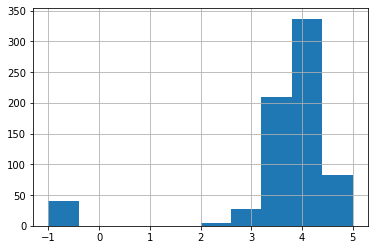

In [152]:
df.Rating.hist()

<Axes: >

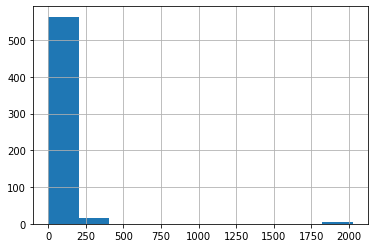

In [154]:
df.age.hist()

In [159]:
df['Salary'] = df['Salary Estimate'].str.replace(',', '').astype(float)

<Axes: >

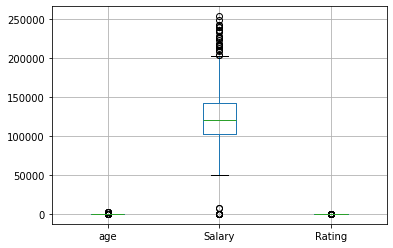

In [160]:
df.boxplot(column = ['age','Salary','Rating'])

<Axes: >

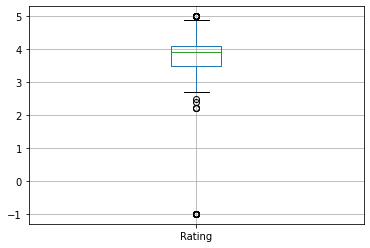

In [161]:
df.boxplot(column = 'Rating')

In [162]:
df[['age','Salary','Rating']].corr()

,age,Salary,Rating
age,1.000000,-0.148703,-0.546576
Salary,-0.148703,1.000000,0.087903
Rating,-0.546576,0.087903,1.000000


<Axes: >

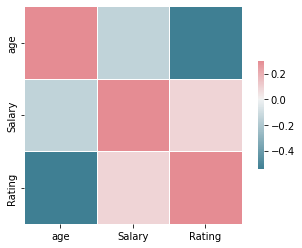

In [163]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','Salary','Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [164]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'monthly', 'job_state',
       'age', 'Job Title Simplified', 'job_role', 'job_seniority', 'Salary'],
      dtype='object')

In [165]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_role', 'job_seniority']]

graph for Location: total = 209


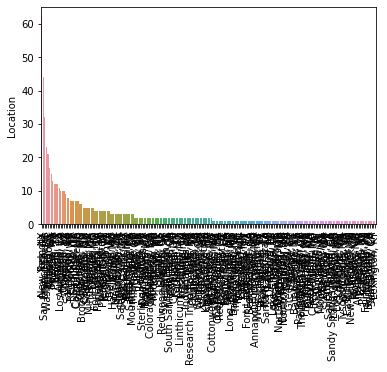

graph for Size: total = 9


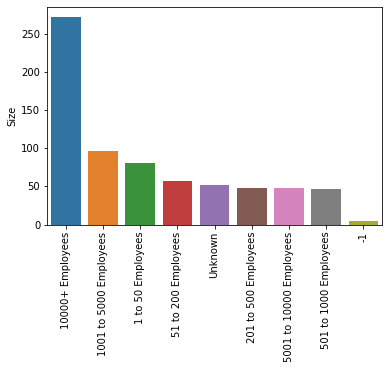

graph for Type of ownership: total = 11


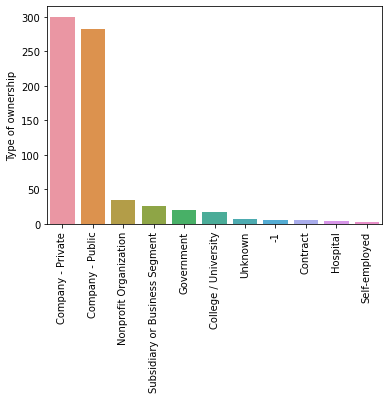

graph for Industry: total = 69


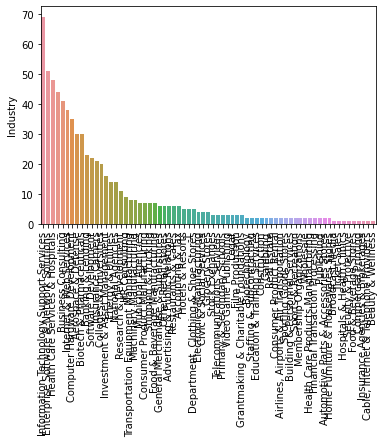

graph for Sector: total = 26


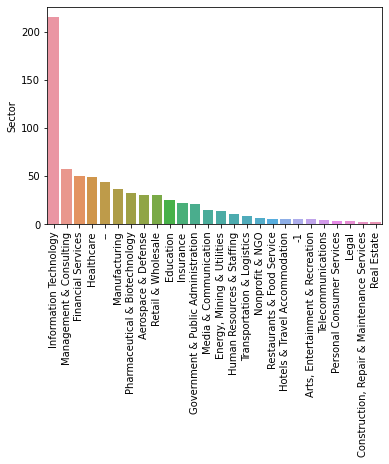

graph for Revenue: total = 11


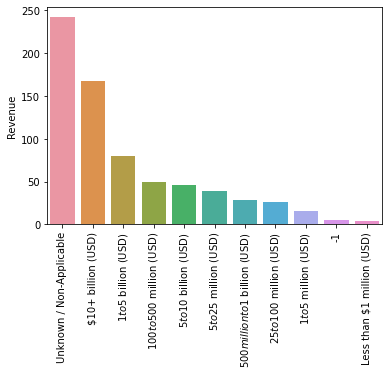

graph for Company Name: total = 460


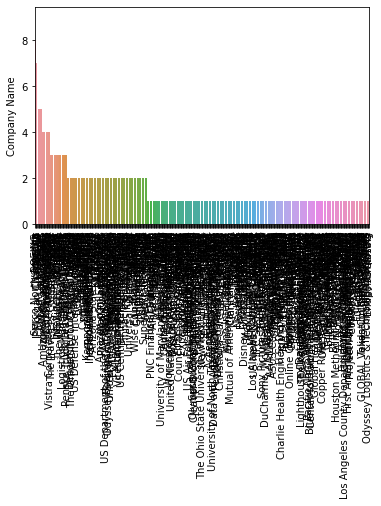

graph for job_role: total = 4


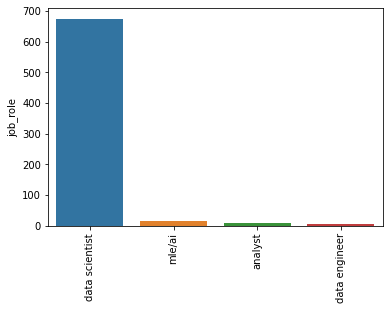

graph for job_seniority: total = 7


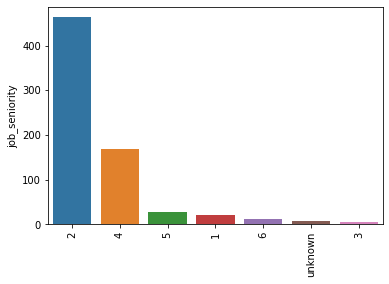

In [166]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [167]:
pd.pivot_table(df, index = 'job_role', values = 'Salary')

,Salary
job_role,
analyst,93641.000000
data engineer,126847.750000
data scientist,126055.948148
mle/ai,114822.571429


In [168]:
pd.pivot_table(df, index = ['job_role','job_seniority'], values = 'Salary')

Salary
job_role       job_seniority               
analyst        2               84932.000000
               4               96667.666667
               unknown         93270.000000
data engineer  2              126847.750000
data scientist 1               97707.600000
               2              116755.051685
               3              125558.000000
               4              148442.901235
               5              152624.000000
               6              165818.416667
               unknown        108806.000000
mle/ai         2              112330.166667
               4              100054.000000
               5              159500.000000

In [172]:
pd.pivot_table(df, index = ['job_state','job_role'], values = 'Salary').sort_values('job_state', ascending = False)

Salary
job_state     job_role                     
WI            data scientist  112515.000000
WA            mle/ai          159500.000000
              data scientist  136497.250000
Virginia      data scientist  122500.000000
VA            data scientist  115401.709677
              analyst          83435.000000
United States data scientist  132517.022727
              analyst         105000.000000
UT            data scientist   95155.166667
TX            mle/ai          100054.000000
              data scientist  115179.442623
              analyst          60909.000000
TN            data scientist  104050.250000
SD            data scientist   90000.000000
SC            analyst         116138.000000
Remote        data engineer    97295.500000
              analyst          92500.000000
              mle/ai              75.000000
              data scientist  125747.198276
RI            data scientist  196086.000000
Pennsylvania  data scientist  124875.000000
PA            data scientist  122620.277778
              analyst          77364.000000
OR            mle/ai          109029.000000
              data scientist   76183.750000
OH            mle/ai           73650.000000
              data scientist  106219.900000
NY            data scientist  144178.531915
              data engineer   156400.000000
NV            data scientist  101487.000000
NM            data scientist   87113.000000
NJ            data scientist  120685.083333
NE            data scientist   96928.000000
NC            mle/ai           84742.000000
              data scientist  113675.500000
Manhattan     data scientist   89053.000000
MS            data scientist   80049.000000
MO            data scientist  113044.666667
MN            data scientist  121631.928571
MI            data scientist   97498.666667
              analyst          98386.000000
ME            data scientist   92113.000000
MD            mle/ai          124707.000000
              data scientist  107304.000000
MA            mle/ai          123388.000000
              data scientist  128036.173913
LA            data scientist   96358.500000
KY            data scientist   96731.333333
KS            data scientist   90215.000000
IN            data scientist   99364.666667
IL            mle/ai          109066.000000
              data scientist  113707.571429
IA            data scientist  118930.500000
GA            data scientist  141695.555556
              analyst          70975.000000
Fulton        data scientist  100247.000000
FL            data scientist   99752.687500
              analyst         115565.000000
DE            data scientist  124379.000000
DC            data scientist  120732.904762
CT            data scientist  104711.800000
CO            data scientist  124160.428571
CA            mle/ai          162413.750000
              data scientist  155422.646018
AZ            data scientist  120475.272727
AR            data scientist   99039.000000
AL            data scientist  109808.750000

In [173]:
pd.pivot_table(df[df.job_role == 'data scientist'], index = 'job_state', values = 'Salary').sort_values('Salary', ascending = False)

,Salary
job_state,
RI,196086.000000
CA,155422.646018
NY,144178.531915
GA,141695.555556
WA,136497.250000
United States,132517.022727
MA,128036.173913
Remote,125747.198276
Pennsylvania,124875.000000


In [174]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','hourly', 'Type of ownership','Salary']]

In [ ]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Salary').sort_values('Salary', ascending = False))